<a href="https://colab.research.google.com/github/kridtapon/Simple-Candle-Strategy/blob/main/Candle_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
pip install yfinance

In [138]:
pip install mplfinance

In [139]:
import yfinance as yf
import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [210]:
data = yf.download("BTC-USD", period="5y")

[*********************100%***********************]  1 of 1 completed


In [211]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2019-11-18 00:00:00+00:00,8309.286133,8309.286133,8653.280273,8273.573242,8573.980469,21579470673
2019-11-19 00:00:00+00:00,8206.145508,8206.145508,8408.516602,8099.963379,8305.134766,21083613816
2019-11-20 00:00:00+00:00,8027.268066,8027.268066,8237.240234,8010.511719,8203.613281,20764300437
2019-11-21 00:00:00+00:00,7642.750000,7642.750000,8110.098145,7597.381836,8023.644531,22514243371
2019-11-22 00:00:00+00:00,7296.577637,7296.577637,7697.382812,6936.706543,7643.569336,34242315785
...,...,...,...,...,...,...
2024-11-14 00:00:00+00:00,87250.429688,87250.429688,91765.218750,86682.812500,90574.882812,87616705248
2024-11-15 00:00:00+00:00,91066.007812,91066.007812,91868.742188,87124.898438,87284.179688,78243109518


In [212]:
df = data.copy()

In [213]:
#df = df.dropna()

df = df.ffill()

In [214]:
df.columns = ['Date','Close','High','Low','Open','Volume']

In [215]:
df

,Date,Close,High,Low,Open,Volume
Date,,,,,,
2019-11-18 00:00:00+00:00,8309.286133,8309.286133,8653.280273,8273.573242,8573.980469,21579470673
2019-11-19 00:00:00+00:00,8206.145508,8206.145508,8408.516602,8099.963379,8305.134766,21083613816
2019-11-20 00:00:00+00:00,8027.268066,8027.268066,8237.240234,8010.511719,8203.613281,20764300437
2019-11-21 00:00:00+00:00,7642.750000,7642.750000,8110.098145,7597.381836,8023.644531,22514243371
2019-11-22 00:00:00+00:00,7296.577637,7296.577637,7697.382812,6936.706543,7643.569336,34242315785
...,...,...,...,...,...,...
2024-11-14 00:00:00+00:00,87250.429688,87250.429688,91765.218750,86682.812500,90574.882812,87616705248
2024-11-15 00:00:00+00:00,91066.007812,91066.007812,91868.742188,87124.898438,87284.179688,78243109518
2024-11-16 00:00:00+00:00,90558.476562,90558.476562,91763.945312,90094.226562,91064.367188,44333192814


In [216]:
df.drop(['Date'], axis='columns', inplace=True)

In [217]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2019-11-18 00:00:00+00:00,8309.286133,8653.280273,8273.573242,8573.980469,21579470673
2019-11-19 00:00:00+00:00,8206.145508,8408.516602,8099.963379,8305.134766,21083613816
2019-11-20 00:00:00+00:00,8027.268066,8237.240234,8010.511719,8203.613281,20764300437
2019-11-21 00:00:00+00:00,7642.750000,8110.098145,7597.381836,8023.644531,22514243371
2019-11-22 00:00:00+00:00,7296.577637,7697.382812,6936.706543,7643.569336,34242315785
...,...,...,...,...,...
2024-11-14 00:00:00+00:00,87250.429688,91765.218750,86682.812500,90574.882812,87616705248
2024-11-15 00:00:00+00:00,91066.007812,91868.742188,87124.898438,87284.179688,78243109518
2024-11-16 00:00:00+00:00,90558.476562,91763.945312,90094.226562,91064.367188,44333192814


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


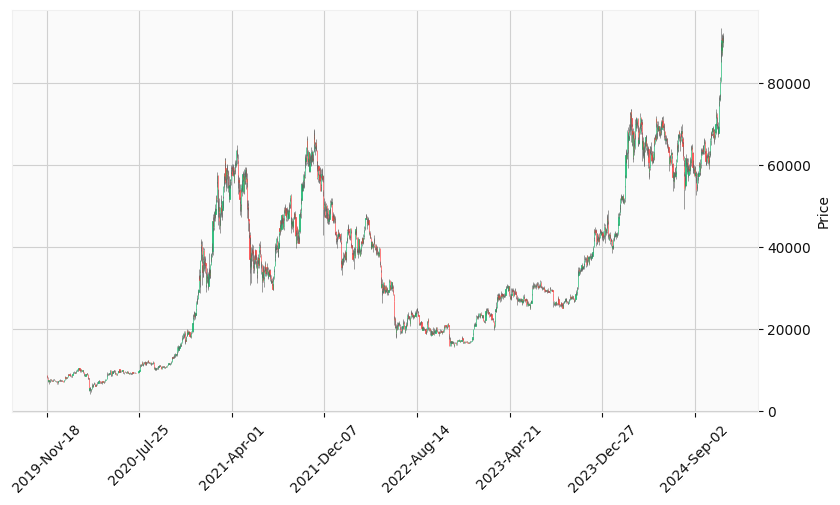

In [218]:
mpf.plot(df, style='yahoo',type='candle',figratio=(18,10))

In [219]:
def Trading_Condition(df):
    # Identify basic candle types
    df['Bullish Candle'] = df['Close'] > df['Open']
    df['Bearish Candle'] = df['Close'] < df['Open']
    df['Prev Bullish Candle'] = df['Close'].shift(1) > df['Open'].shift(1)
    df['Prev Bearish Candle'] = df['Close'].shift(1) < df['Open'].shift(1)
    df['Prev_2_Bullish'] = df['Close'].shift(2) > df['Open'].shift(2)
    df['Prev_2_Bearish'] = df['Close'].shift(2) < df['Open'].shift(2)

    # Bullish conditions
    df['Prev_2_Bearish Low < Prev Bullish Low'] = df['Low'].shift(2) < df['Low'].shift(1)
    df['Prev_2_Bearish Open < Prev Bullish Close'] = df['Open'].shift(2) < df['Close'].shift(1)
    df['Prev_2_Bearish'] = df['Close'].shift(2) < df['Open'].shift(2)
    df['Bearish Candle'] = df['Close'] < df['Open']
    df['Prev Bullish Low < Bearish low'] = df['Low'].shift(1) < df['Low']
    df['Prev Bullish Open < Bearish Close'] = df['Open'].shift(1) < df['Close']
    df['Close - Low'] = df['Close'] - df['Low']
    df['High - Close'] = df['High'] - df['Close']
    df['2R'] = df['High - Close']/df['Close - Low'] > 2


    # Identify the patterns
    df['Bullish Engulfing'] = (df['Prev_2_Bearish Low < Prev Bullish Low'] &
                               df['Prev_2_Bearish Open < Prev Bullish Close'] &
                               df['Prev_2_Bearish'] &
                               df['Bearish Candle'] &
                               df['Prev Bullish Low < Bearish low'] &
                               df['Prev Bullish Open < Bearish Close'] &
                               df['2R'])

    return df

In [220]:
# Apply the function
df_C = Trading_Condition(df)

In [221]:
df_C

,Close,High,Low,Open,Volume,Bullish Candle,Bearish Candle,Prev Bullish Candle,Prev Bearish Candle,Prev_2_Bullish,Prev_2_Bearish,Prev_2_Bearish Low < Prev Bullish Low,Prev_2_Bearish Open < Prev Bullish Close,Prev Bullish Low < Bearish low,Prev Bullish Open < Bearish Close,Close - Low,High - Close,2R,Bullish Engulfing
Date,,,,,,,,,,,,,,,,,,,
2019-11-18 00:00:00+00:00,8309.286133,8653.280273,8273.573242,8573.980469,21579470673,False,True,False,False,False,False,False,False,False,False,35.712891,343.994141,True,False
2019-11-19 00:00:00+00:00,8206.145508,8408.516602,8099.963379,8305.134766,21083613816,False,True,False,True,False,False,False,False,False,False,106.182129,202.371094,False,False
2019-11-20 00:00:00+00:00,8027.268066,8237.240234,8010.511719,8203.613281,20764300437,False,True,False,True,False,True,False,False,False,False,16.756348,209.972168,True,False
2019-11-21 00:00:00+00:00,7642.750000,8110.098145,7597.381836,8023.644531,22514243371,False,True,False,True,False,True,False,False,False,False,45.368164,467.348145,True,False
2019-11-22 00:00:00+00:00,7296.577637,7697.382812,6936.706543,7643.569336,34242315785,False,True,False,True,False,True,False,False,False,False,359.871094,400.805176,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-14 00:00:00+00:00,87250.429688,91765.218750,86682.812500,90574.882812,87616705248,False,True,True,False,False,True,True,True,True,False,567.617188,4514.789062,True,False
2024-11-15 00:00:00+00:00,91066.007812,91868.742188,87124.898438,87284.179688,78243109518,True,False,False,True,True,False,True,False,True,True,3941.109375,802.734375,False,False
2024-11-16 00:00:00+00:00,90558.476562,91763.945312,90094.226562,91064.367188,44333192814,False,True,True,False,False,True,True,True,True,True,464.250000,1205.468750,True,True


In [222]:
df_C['Bullish Engulfing']

,Bullish Engulfing
Date,
2019-11-18 00:00:00+00:00,False
2019-11-19 00:00:00+00:00,False
2019-11-20 00:00:00+00:00,False
2019-11-21 00:00:00+00:00,False
2019-11-22 00:00:00+00:00,False
...,...
2024-11-14 00:00:00+00:00,False
2024-11-15 00:00:00+00:00,False
2024-11-16 00:00:00+00:00,True


In [223]:
Data_T = df_C['Bullish Engulfing']

In [224]:
Data_T

,Bullish Engulfing
Date,
2019-11-18 00:00:00+00:00,False
2019-11-19 00:00:00+00:00,False
2019-11-20 00:00:00+00:00,False
2019-11-21 00:00:00+00:00,False
2019-11-22 00:00:00+00:00,False
...,...
2024-11-14 00:00:00+00:00,False
2024-11-15 00:00:00+00:00,False
2024-11-16 00:00:00+00:00,True


In [225]:
Data_T

,Bullish Engulfing
Date,
2019-11-18 00:00:00+00:00,False
2019-11-19 00:00:00+00:00,False
2019-11-20 00:00:00+00:00,False
2019-11-21 00:00:00+00:00,False
2019-11-22 00:00:00+00:00,False
...,...
2024-11-14 00:00:00+00:00,False
2024-11-15 00:00:00+00:00,False
2024-11-16 00:00:00+00:00,True


In [226]:
df = data.copy()

In [227]:
#df = df.dropna()

df = df.ffill()

In [228]:
df.columns = ['Date','Close','High','Low','Open','Volume']

In [229]:
df.drop(['Date'], axis='columns', inplace=True)

In [230]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2019-11-18 00:00:00+00:00,8309.286133,8653.280273,8273.573242,8573.980469,21579470673
2019-11-19 00:00:00+00:00,8206.145508,8408.516602,8099.963379,8305.134766,21083613816
2019-11-20 00:00:00+00:00,8027.268066,8237.240234,8010.511719,8203.613281,20764300437
2019-11-21 00:00:00+00:00,7642.750000,8110.098145,7597.381836,8023.644531,22514243371
2019-11-22 00:00:00+00:00,7296.577637,7697.382812,6936.706543,7643.569336,34242315785
...,...,...,...,...,...
2024-11-14 00:00:00+00:00,87250.429688,91765.218750,86682.812500,90574.882812,87616705248
2024-11-15 00:00:00+00:00,91066.007812,91868.742188,87124.898438,87284.179688,78243109518
2024-11-16 00:00:00+00:00,90558.476562,91763.945312,90094.226562,91064.367188,44333192814


In [231]:
print(len(Data_T))
print(len(df))

1828
1828


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


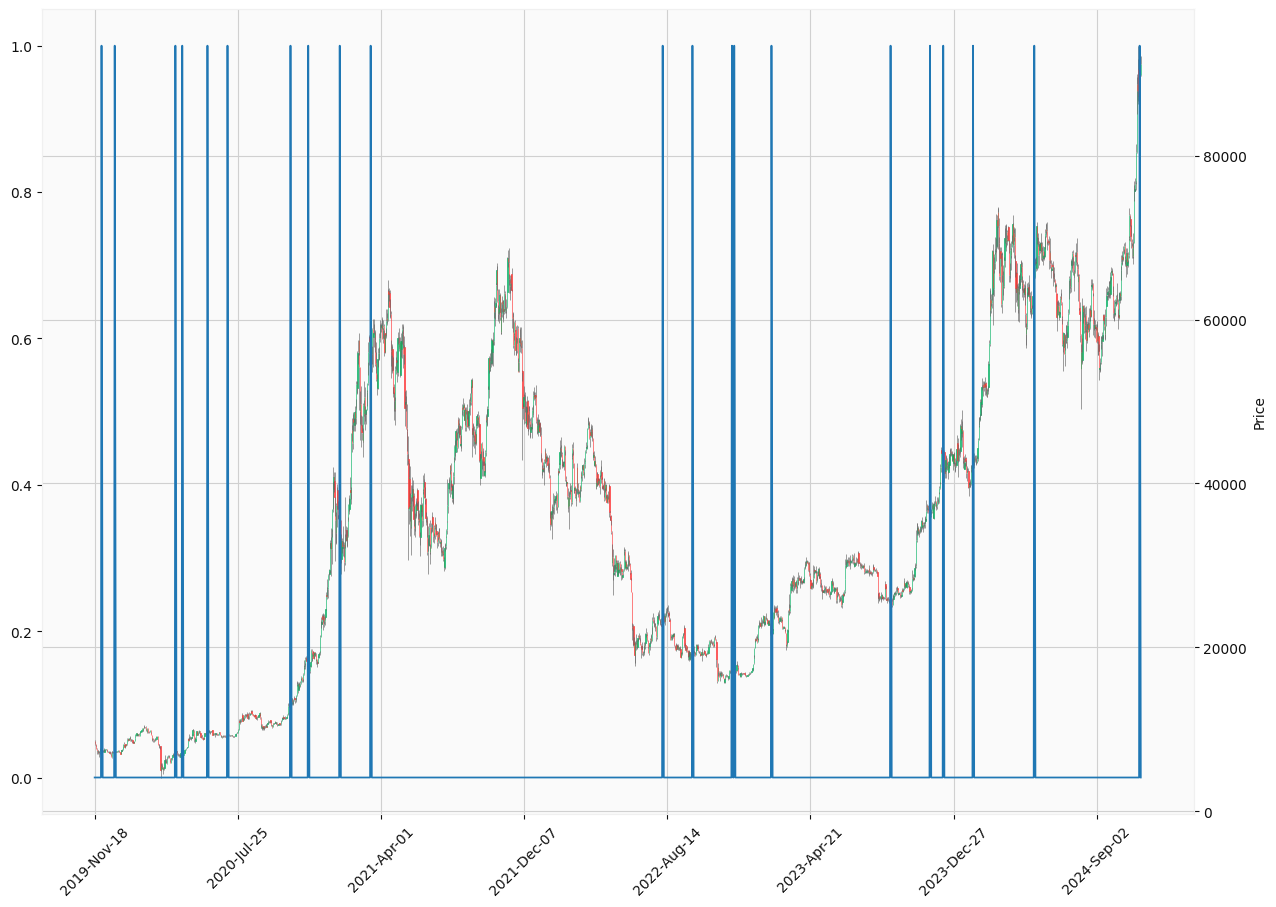

In [232]:
#apd = mpf.make_addplot(Data_T,type='scatter',markersize=10,marker='^')
apd = mpf.make_addplot(Data_T,markersize=50,marker='^')

mpf.plot(df, addplot=apd, style='yahoo',type='candle',figscale=2)